In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [12]:
data = pd.read_csv(r'C:\Users\Varenie\Downloads\test.csv', sep=",")

In [13]:
data.shape

(1568, 16)

In [14]:
data.dtypes

District              object
Grade                 object
Year                  object
Demographic           object
Number Tested         object
Mean Scale Score      object
Num Level 1           object
Pct Level 1           object
Num Level 2           object
Pct Level 2          float64
Num Level 3           object
Pct Level 3          float64
Num Level 4          float64
Pct Level 4          float64
Num Level 3 and 4     object
Pct Level 3 and 4    float64
dtype: object

In [15]:
data.isnull().sum()

District              1
Grade                 0
Year                  2
Demographic           1
Number Tested         1
Mean Scale Score      1
Num Level 1           1
Pct Level 1           1
Num Level 2           2
Pct Level 2           4
Num Level 3           4
Pct Level 3           5
Num Level 4           6
Pct Level 4           9
Num Level 3 and 4    10
Pct Level 3 and 4    10
dtype: int64

In [16]:
data.head()

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,1,3,2006,All Students,936,673,73,7.8,170,18.2,484,51.7,209.0,22.3,693,74.0
1,1,3,2007,All Students,836,679,48,5.7,86,10.3,511,61.1,191.0,22.8,702,84.0
2,1,3,2008,All Students,862,686,17,2,94,10.9,537,62.3,214.0,24.8,751,87.1
3,1,3,2009,All Students,914,691,8,0.9,66,7.2,598,65.4,242.0,26.5,840,91.9
4,1,3,2010,All Students,866,697,89,10.3,257,29.7,279,32.2,241.0,27.8,520,60.0


In [17]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1568, 16), (1568, 1))

In [18]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1568, 16), (1557, 16))

In [19]:
data_new_3 = data.fillna(0)
data_new_3.head()

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,1,3,2006,All Students,936,673,73,7.8,170,18.2,484,51.7,209.0,22.3,693,74.0
1,1,3,2007,All Students,836,679,48,5.7,86,10.3,511,61.1,191.0,22.8,702,84.0
2,1,3,2008,All Students,862,686,17,2,94,10.9,537,62.3,214.0,24.8,751,87.1
3,1,3,2009,All Students,914,691,8,0.9,66,7.2,598,65.4,242.0,26.5,840,91.9
4,1,3,2010,All Students,866,697,89,10.3,257,29.7,279,32.2,241.0,27.8,520,60.0


In [20]:
num_cols = []
total_count = 205
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Pct Level 2. Тип данных float64. Количество пустых значений 4, 1.95%.
Колонка Pct Level 3. Тип данных float64. Количество пустых значений 5, 2.44%.
Колонка Num Level 4. Тип данных float64. Количество пустых значений 6, 2.93%.
Колонка Pct Level 4. Тип данных float64. Количество пустых значений 9, 4.39%.
Колонка Pct Level 3 and 4. Тип данных float64. Количество пустых значений 10, 4.88%.


In [21]:
data_num = data[num_cols]
data_num

,Pct Level 2,Pct Level 3,Num Level 4,Pct Level 4,Pct Level 3 and 4
0,18.2,51.7,209.0,22.3,74.0
1,10.3,61.1,191.0,22.8,84.0
2,10.9,62.3,214.0,24.8,87.1
3,7.2,65.4,242.0,26.5,91.9
4,29.7,32.2,241.0,27.8,60.0
...,...,...,...,...,...
1563,22.4,56.0,1239.0,13.7,69.8
1564,17.3,61.2,1538.0,17.4,78.6
1565,40.3,31.4,1221.0,14.4,45.7
1566,40.6,34.4,977.0,11.9,46.3


In [22]:
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([16, 1567], dtype='int64')

In [23]:
data[data.index.isin(flt_index)]

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
16,1,5,NaN,All Students,856,677,40,4.7,126,14.7,489,57.1,201.0,23.5,690,80.6
1567,32,All Grades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data_num_price = data_num[['Pct Level 2']]
data_num_price.head()

,Pct Level 2
0,18.2
1,10.3
2,10.9
3,7.2
4,29.7


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [30]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_price)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [31]:
strategies=['mean', 'median','most_frequent']

In [32]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_price)
    return data_num_imp[mask_missing_values_only]

In [33]:
strategies[0], test_num_impute(strategies[0])

('mean', array([28.22167519, 28.22167519, 28.22167519, 28.22167519]))

In [34]:
strategies[1], test_num_impute(strategies[1])

('median', array([27.6, 27.6, 27.6, 27.6]))

In [35]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([20.5, 20.5, 20.5, 20.5]))

In [36]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [37]:
data[['Pct Level 2']].describe()

,Pct Level 2
count,1564.000000
mean,28.221675
std,30.054162
min,0.600000
25%,17.600000
50%,27.600000
75%,37.600000
max,1086.000000


In [38]:
name_col = 'Pct Level 2'
test_num_impute_col(data, name_col, strategies[0])

('Pct Level 2', 'mean', 4, 28.221675191815855, 28.221675191815855)

In [39]:
test_num_impute_col(data, name_col, strategies[1])

('Pct Level 2', 'median', 4, 27.6, 27.6)

In [40]:
test_num_impute_col(data, name_col, strategies[2])

('Pct Level 2', 'most_frequent', 4, 20.5, 20.5)

In [41]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка "{}". Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка "District". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "Year". Тип данных object. Количество пустых значений 2, 0.98%.
Колонка "Demographic". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "Number Tested". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "Mean Scale Score". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "Num Level 1". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "Pct Level 1". Тип данных object. Количество пустых значений 1, 0.49%.
Колонка "Num Level 2". Тип данных object. Количество пустых значений 2, 0.98%.
Колонка "Num Level 3". Тип данных object. Количество пустых значений 4, 1.95%.
Колонка "Num Level 3 and 4". Тип данных object. Количество пустых значений 10, 4.88%.


In [42]:
cat_temp_data = data[['Year']]
cat_temp_data.head()

,Year
0,2006
1,2007
2,2008
3,2009
4,2010


In [43]:
cat_temp_data['Year'].unique()

array(['2006', '2007', '2008', '2009', '2010', '2011', '2012', nan,
       '1137', ' ', '930'], dtype=object)

In [45]:
cat_temp_data[cat_temp_data['Year'].isnull()].shape

(2, 1)

In [46]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['2006'],
       ['2007'],
       ['2008'],
       ...,
       ['2010'],
       ['2011'],
       ['2006']], dtype=object)

In [47]:
np.unique(data_imp2)

array([' ', '1137', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '930'], dtype=object)

In [48]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='const')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['2006'],
       ['2007'],
       ['2008'],
       ...,
       ['2010'],
       ['2011'],
       ['const']], dtype=object)

In [49]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,2006
1,2007
2,2008
3,2009
4,2010
...,...
1563,2008
1564,2009
1565,2010
1566,2011


In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [51]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [52]:
cat_enc['c1'].unique()

array(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '1137',
       ' ', '930'], dtype=object)

In [53]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
le.inverse_transform([0])

array([' '], dtype=object)

In [55]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [56]:
cat_enc.shape

(1568, 1)

In [57]:
cat_enc_ohe.shape

(1568, 10)

In [58]:
cat_enc_ohe

<1568x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1568 stored elements in Compressed Sparse Row format>

In [59]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [60]:
cat_enc.head(10)

,c1
0,2006
1,2007
2,2008
3,2009
4,2010
5,2011
6,2012
7,2006
8,2007
9,2008


In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [68]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Pct Level 4']])

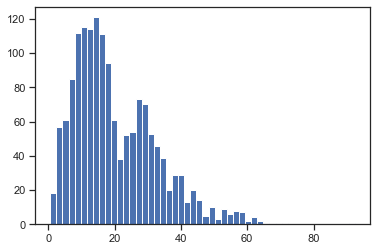

In [70]:
plt.hist(data['Pct Level 4'], 50)
plt.show()

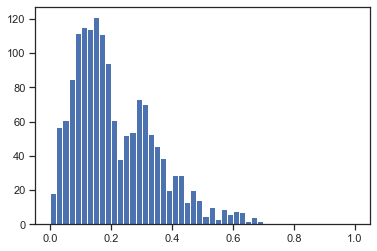

In [71]:
plt.hist(sc1_data, 50)
plt.show()

In [73]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Pct Level 4']])

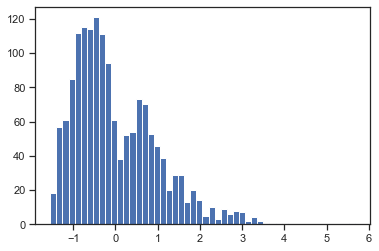

In [74]:
plt.hist(sc2_data, 50)
plt.show()

In [ ]:
# The end.